<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Descriptive Statistics and Visualizations

### Median value of owner-occupied homes (boxplot)

<AxesSubplot:ylabel='MEDV'>

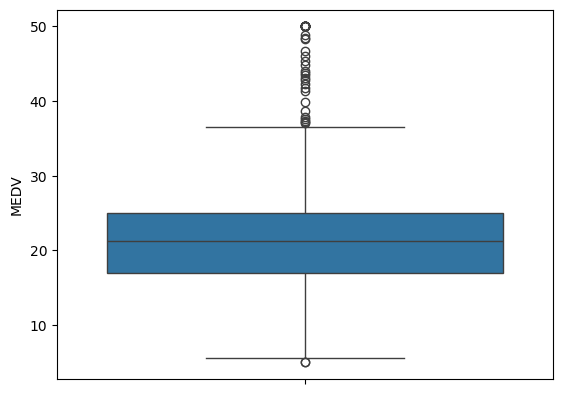

In [31]:
sns.boxplot(data=boston_df["MEDV"])

### Bar plot for the Charles river variable

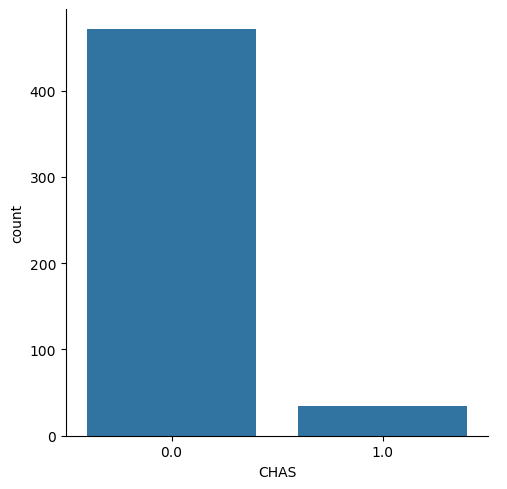

In [20]:
sns.catplot(x='CHAS',kind='count',data=boston_df)

### Boxplot for the MEDV variable vs the AGE variable. 

In [24]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

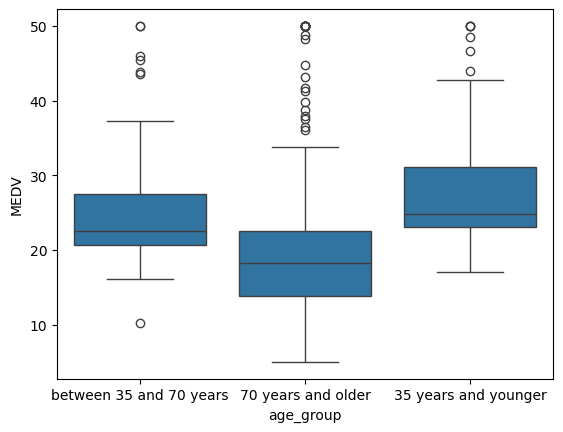

In [25]:
sns.boxplot(x='age_group',y='MEDV',data=boston_df)

### Scatter plot forNitric oxide concentrations and the proportion of non-retail business acres per town

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

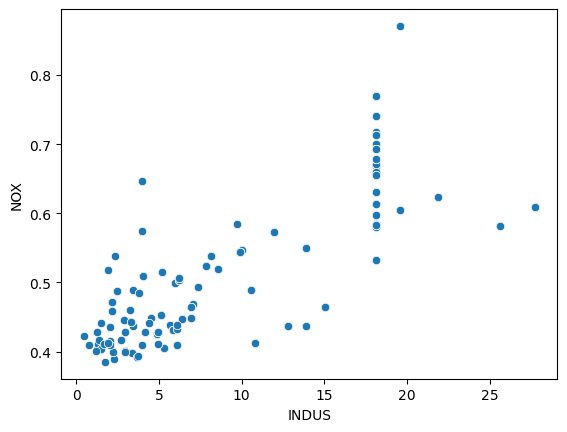

In [27]:
sns.scatterplot(x='INDUS',y='NOX',data=boston_df)

We can say that there is a posible positive correlation 

### Histogram for the pupil to teacher ratio variable




<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

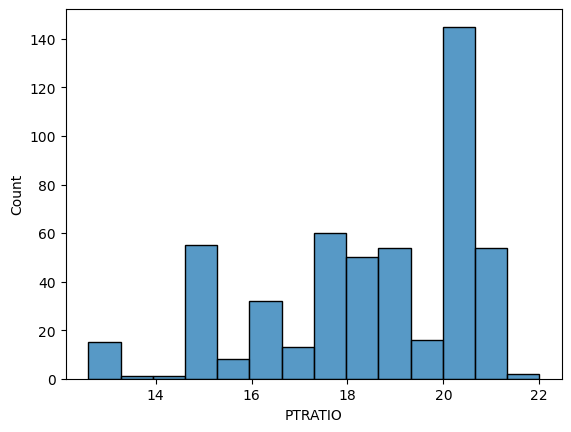

In [29]:
sns.histplot(boston_df['PTRATIO'])

## Tests to answer the questions provided

- Is there a significant difference in median value of houses bounded by the Charles river or not? 

First, we use the Levenes's test for equality of variances

In [33]:
scipy.stats.levene(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'])

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

pvalue < 0.05, so we assume that variances are not equal

Our hypothesis are:  
H0-> There is no difference in median value of houses bounded by the Charles river or not  
H1-> There is difference in median value of houses bounded by the Charles river or not

In [35]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==1]['MEDV'],boston_df[boston_df['CHAS']==0]['MEDV'],equal_var=False)

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

p value < 0.05 so we conclude that there ir significant difference  in median value of houses bounded by the Charles river or not

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? 

We have to do equality of variance's test

First, we assingn our samples to variables

In [46]:
younger35=boston_df[boston_df['age_group']=='35 years and younger']['MEDV']
between35_70=boston_df[boston_df['age_group']=='between 35 and 70 years']['MEDV']
older70=boston_df[boston_df['age_group']=='70 years and older']['MEDV']


In [51]:
scipy.stats.levene(younger35,between35_70,older70,center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

We see that pvalue is greater than 0.05, so we fail to reject H0 and assume that variances are not equal

In [50]:
scipy.stats.f_oneway(younger35,between35_70,older70)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

pvalue is less than 0.05, so we reject H0 and assume that there is a significant difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

State the hypothesis:  
H0->there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town  
H1->there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [54]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

pvalue is less than 0.05, so we reject H0 and assume that there is there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

We are going to do a regression analysis to see if DIS affects significantly MEDV

In [58]:
X=boston_df['DIS']
y=boston_df['MEDV']
X=sm.add_constant(X)
                 
model=sm.OLS(y,X).fit()
prediction=model.predict()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 25 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        13:12:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As p-value is less than 0.05 we conclude that a change in DIS impact signifincantly on MEDV